In [1]:
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import torch
from torch_geometric.data import Data

import random

from scipy.io import savemat, loadmat

from genome_file import encodeAdj

In [2]:
def curve_line(p1, p2):
    if p1 == p2:
        return (p1, p1)
    if p2 < p1:
        p1, p2 = p2, p1
    x = np.linspace(p1, p2, 100 * (p2 - p1))
    wid = p2 - p1 + 2
    rad = (x - p1 + 1)/wid * np.pi
    y = (np.sin(rad) - np.sin(1/wid * np.pi))/(1 - np.sin(1/wid * np.pi))
    return (x, np.absolute(y))

In [3]:
def draw_curve(adjList, color = 'k', scale = 1):
    size = adjList.size//2 - 1
    for t in np.arange(size*2 - 1) + 1:
        p1, p2 = adjList[t], adjList[t + 1]
        if np.abs(p1-p2) == 1:
            s = 0.1 * scale
        else:
            s = 1 * scale
        x, y = curve_line(p1, p2)
        if t%2 == 0:
            plt.plot(x, y * s, color = color)        
        else:
            plt.plot(x, y * s, color = 'k')        

In [4]:
def draw_base(size):
    points = np.arange(size * 2) + 1
    for p in points:
        plt.plot(p, 0, 'o')
    for t in np.arange(size*2 - 1) + 1:
        if t%2 == 0:
            color = 'c'        
        else:
            color = 'k'
        plt.plot([t, t + 1], [0, 0], 'o', linestyle='-.', color = color)

gnome1, gnome2, gnome3

In [5]:
g1 = [1,2,3,4,5,6,7,8,-180,60,-155,-154,-153,-152,190,191,192,193,-110,-109,-108,-99,-98,-97,-96,
     85,86,87,88,89,90,91,92,93,94,95,-84,-131,-130,-129,-128,-157,-156,61,62,63,-53,-52,32,33,34,
     177,178,-137,-136,-135,-134,-133,-132,-83,-82,-81,-80,-79,-78,-102,-164,-163,-40,103,104,-199,
     -198,-197,-196,-195,-194,111,112,179,-183,-45,-118,-51,-50,-49,-48,-47,-46,101,-175,-174,165,
     166,167,168,169,170,171,172,173,176,35,-127,-126,-125,-124,-123,-122,-121,-120,-119,-44,-43,
     -42,25,26,27,140,141,142,143,144,145,146,147,148,-21,-20,-19,-139,-138,113,114,115,116,117,-31,
     -30,158,159,160,161,162,41,-24,-23,-22,149,150,151,-189,-188,75,76,77,-39,-38,-37,-36,-29,-28,-18,
     -17,-16,-15,-14,-13,-12,-11,-10,185,186,187,-74,-73,-72,-71,-70,-69,-68,-67,-66,-65,-64,54,55,56,57,
     58,59,184,-9,181,182,-100,-107,-106,-105,200];
g2 = [1,2,3,4,88,-161,-160,-159,-158,-157,-156,-155,-154,-153,-152,190,178,113,114,87,5,6,7,8,9,10,11,12,13,
      14,15,16,17,168,169,170,171,79,80,81,82,83,84,85,86,115,116,-90,-89,162,163,164,-173,-172,-78,-77,109,
      110,-193,-192,-191,-177,53,54,55,56,-24,-23,-22,149,150,151,-189,-188,75,76,-108,-107,-106,21,-148,-147,
      -146,-179,-112,-111,194,195,196,197,198,199,-39,-38,-37,-36,-35,-176,102,103,104,-121,28,29,-18,-167,-166,
      -165,174,175,-101,46,47,48,49,120,30,31,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,
      139,140,141,142,143,144,145,-183,-182,-181,-180,184,-25,42,43,44,45,-100,-99,-98,-97,95,96,-94,-93,-92,
      -91,117,118,119,50,51,52,-34,-33,-32,-122,105,-20,-19,-27,-26,185,186,187,-74,-73,-72,-71,-70,-69,-68,-67,
      -66,-65,-64,-63,-62,-61,-60,-59,-58,-57,-41,-40,200];
g3 = [1,2,-23,-22,149,150,-21,-20,-19,-67,-66,-65,-64,199,-39,-38,-37,-36,-35,-176,102,103,104,-121,-29,-110,
      -109,77,78,148,-187,-186,-185,26,27,68,69,70,71,72,73,74,151,12,13,14,15,177,178,113,114,115,116,-90,
      -89,162,163,164,193,-28,-18,91,92,93,40,41,-24,3,4,88,-161,-160,-159,-158,-157,-156,-155,-154,-153,
      -152,190,191,192,-173,-172,9,10,-179,-112,-111,194,195,196,32,33,34,87,5,6,7,-129,-128,-127,-126,-125,
      -124,-123,-31,-30,-120,-49,-48,-60,-59,-58,-57,-56,-55,-54,-53,136,-141,-140,-139,-138,-137,61,166,167,117,
      118,119,50,51,52,-86,-85,-84,181,182,183,-17,-16,-135,63,-198,-197,-122,105,106,107,108,-76,-75,188,189,
      -11,146,147,-42,25,-184,180,-83,-82,-81,-80,-79,142,143,144,145,168,169,170,171,-8,130,131,132,-46,101,-175,
      -174,165,62,-134,133,47,43,44,45,-100,-99,-98,-97,95,96,-94,200];

In [6]:
A = encodeAdj(g1)
B = encodeAdj(g2)
C = encodeAdj(g3)

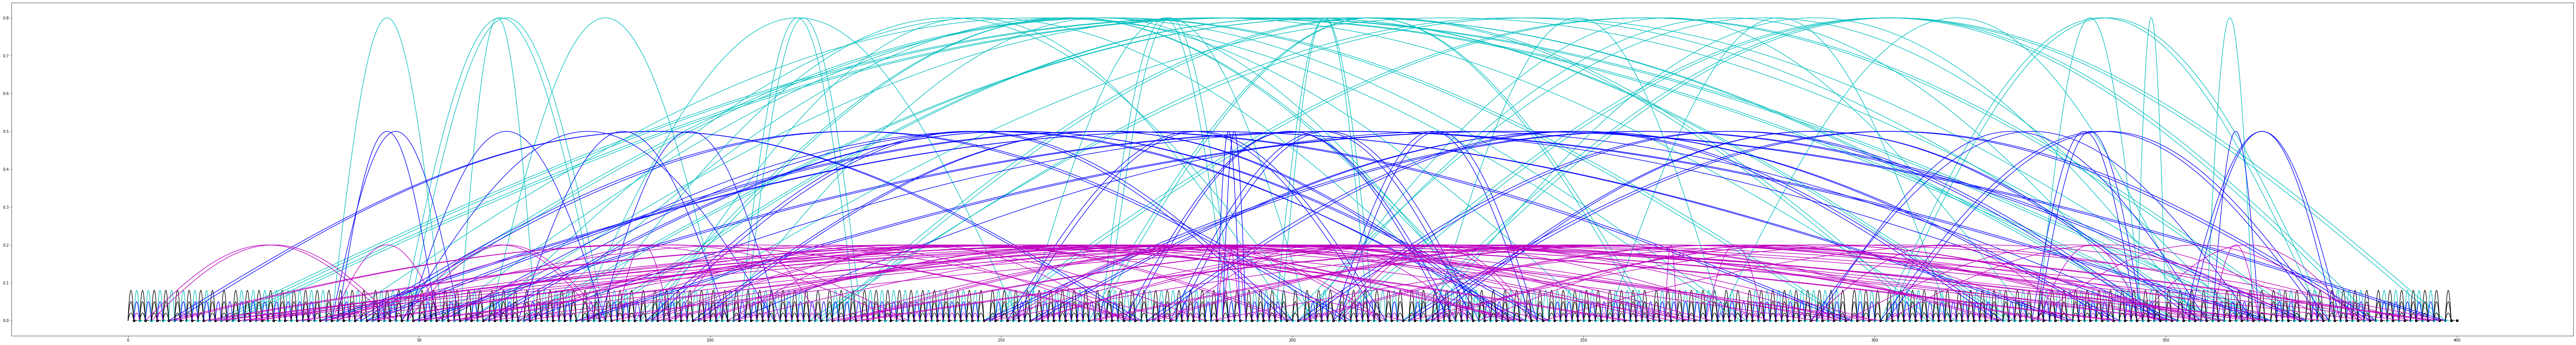

In [7]:
figure(figsize=(120, 16))

draw_base(A.size//2 - 1)
draw_curve(A, color = 'c', scale = 0.8)
draw_curve(B, color = 'b', scale = 0.5)
draw_curve(C, color = 'm', scale = 0.2)

In [8]:
import networkx as nx

from torch_geometric.utils.convert import to_networkx

In [9]:
from genome_file import read_genome

In [10]:
test = read_genome('data/genome.txt')

In [11]:
from genome_graph import gen_single_graph, gen_multi_graph, plot_multi_graph

In [12]:
tmp = gen_multi_graph(test[1], test[2], test[3])

In [13]:
tmp

[Data(x=[40, 2], edge_index=[2, 39], dtype=torch.int64, num_nodes=40),
 Data(x=[40, 2], edge_index=[2, 39], dtype=torch.int64, num_nodes=40),
 Data(x=[40, 2], edge_index=[2, 39], dtype=torch.int64, num_nodes=40)]

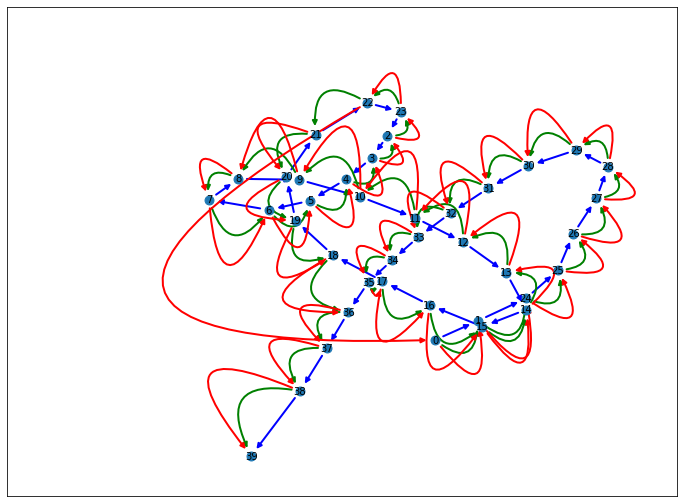

In [14]:
plot_multi_graph(tmp, figsize=(12,9))

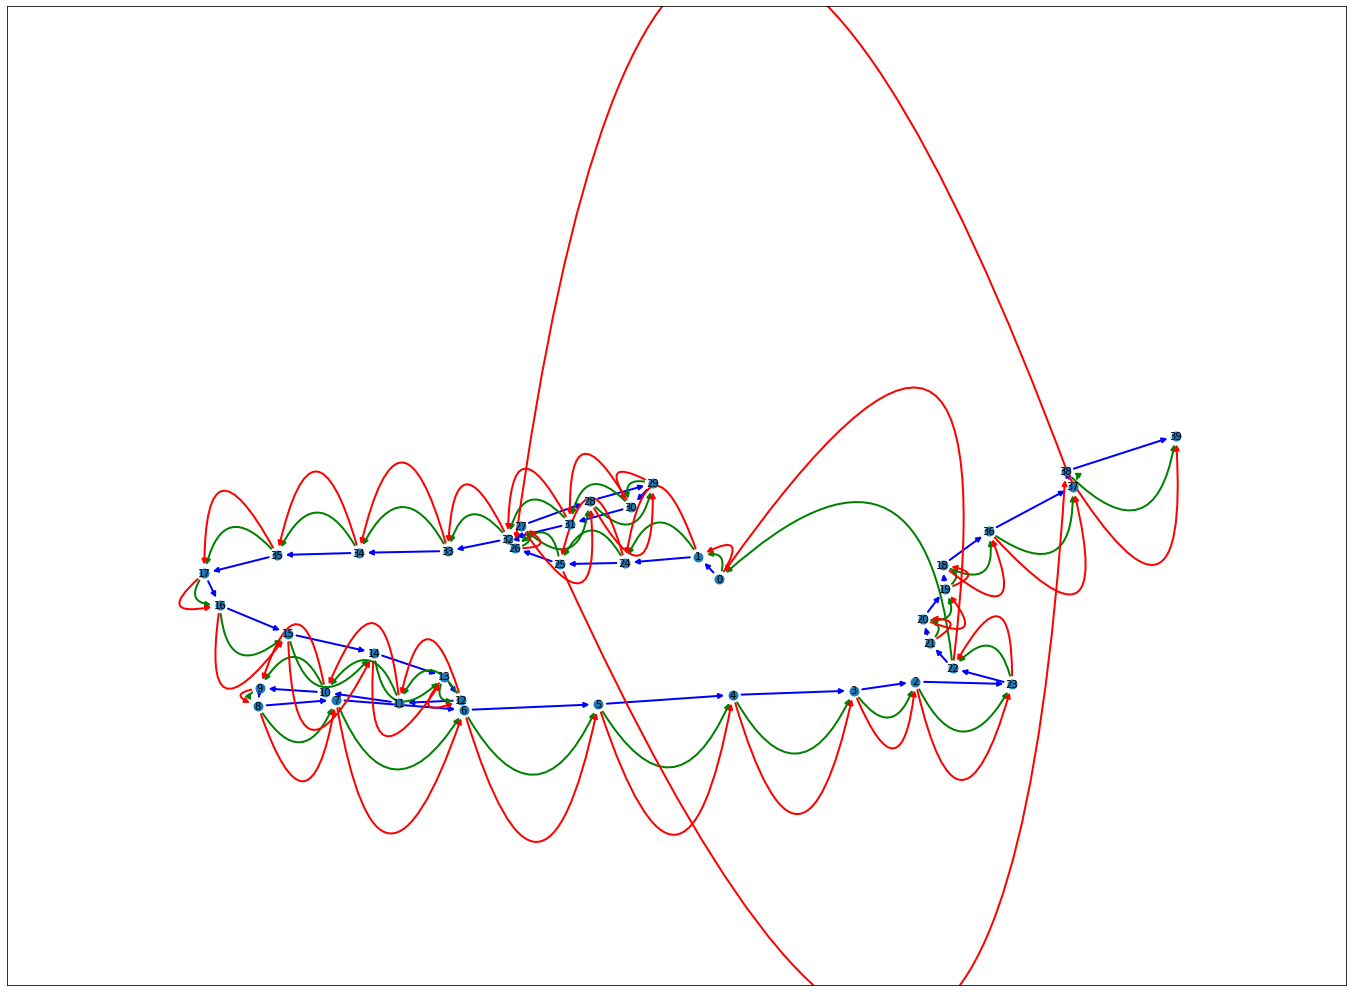

In [15]:
plot_multi_graph(gen_multi_graph(*test[2:5]), figsize=(24,18))

In [16]:
g0 = gen_single_graph(test[0])

In [17]:
pos = nx.spring_layout(to_networkx(g0))

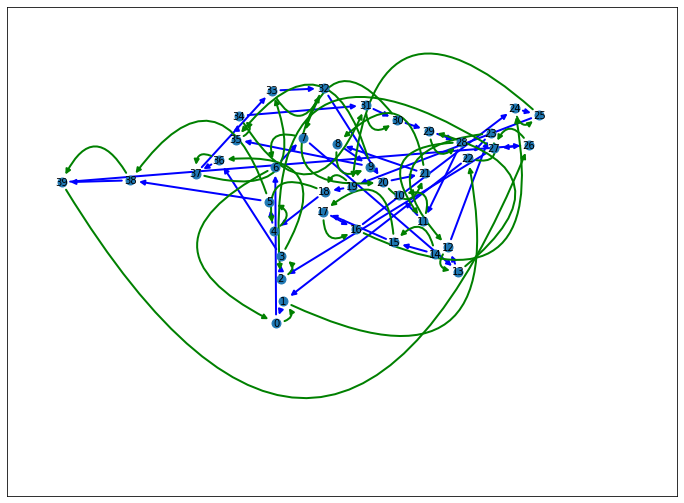

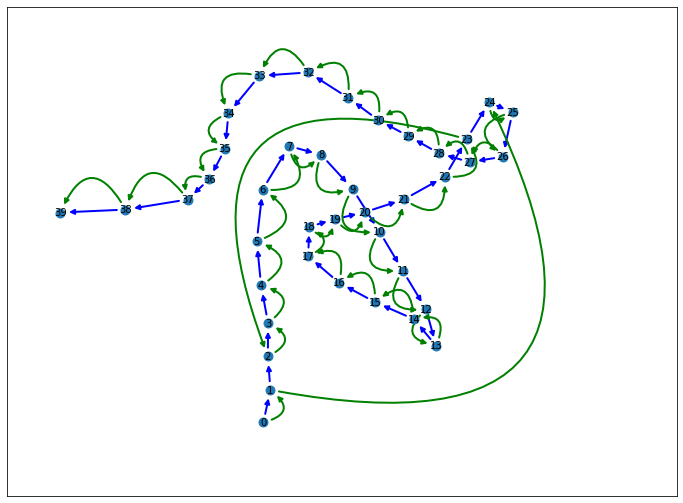

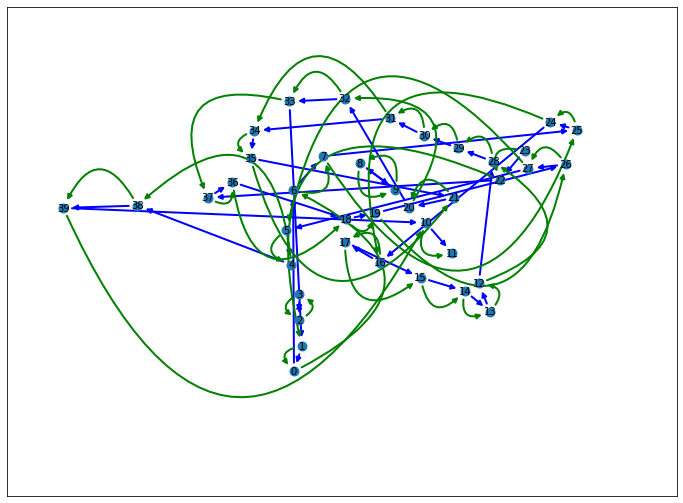

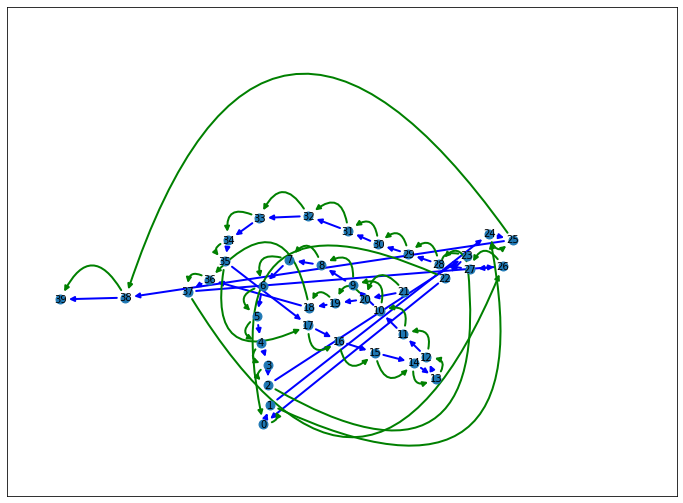

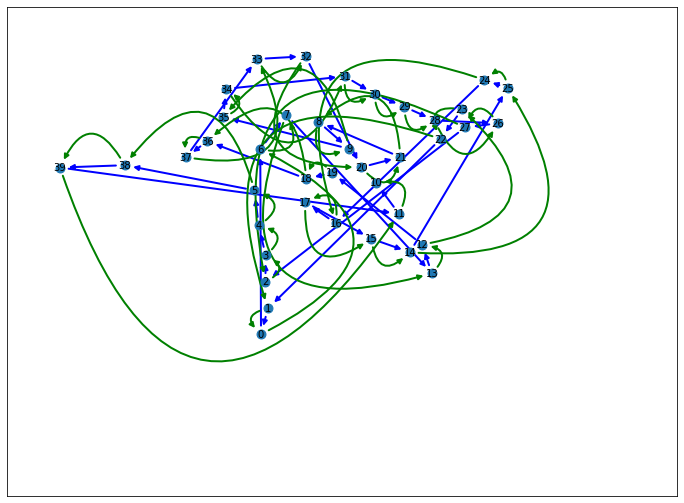

In [18]:
for i in np.random.choice((len(test) - 1), 5, replace=False):
    plot_multi_graph(gen_multi_graph(*test[i:i+2]), figsize=(12,9), pos=pos)

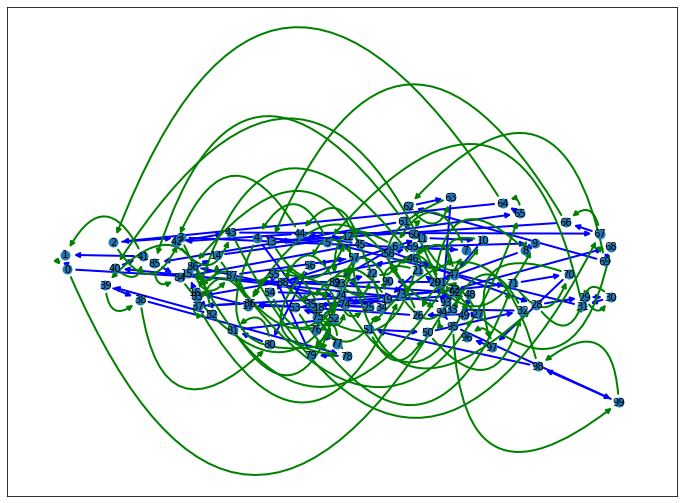

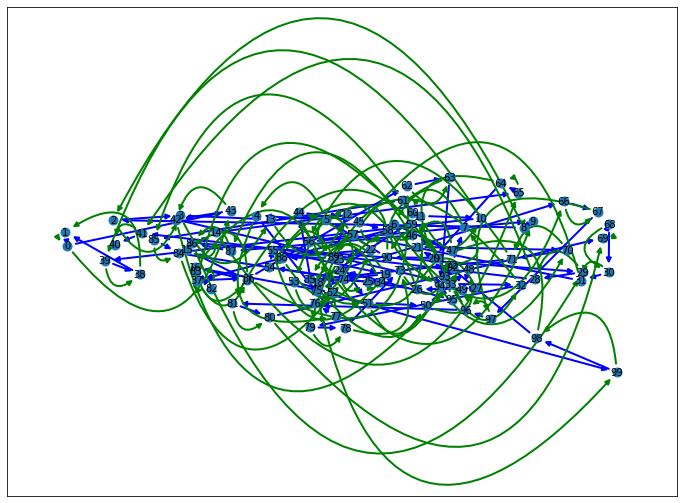

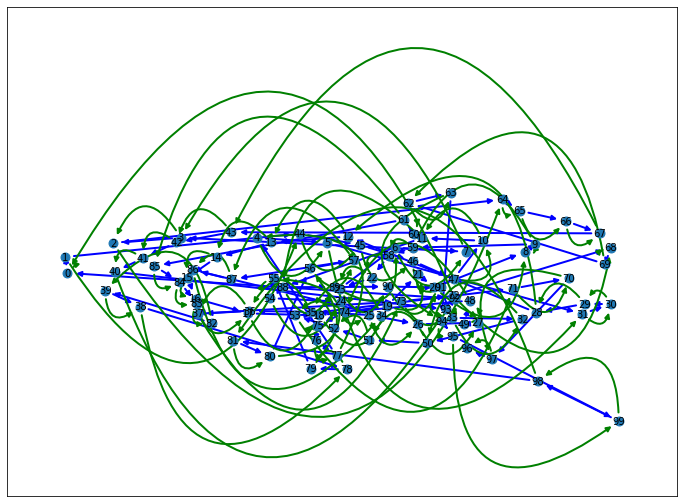

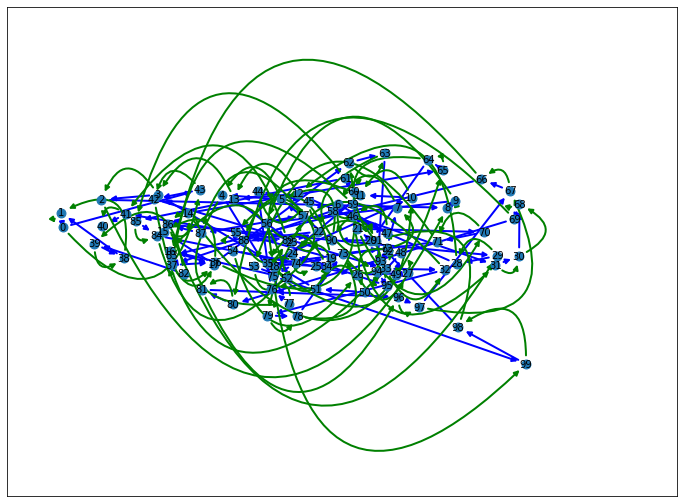

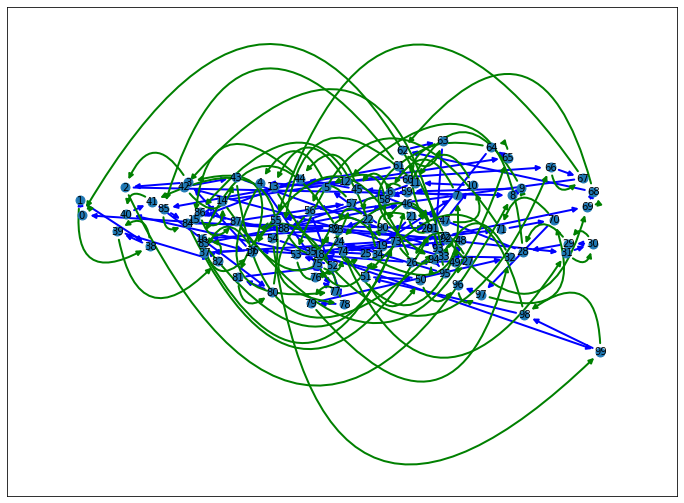

In [19]:
test_50 = read_genome(fname='genome_50.txt')
g_50 = gen_single_graph(test_50[0])
pos = nx.spring_layout(to_networkx(g_50))
for i in np.random.choice((len(test_50) - 1), 5, replace=False):
    plot_multi_graph(gen_multi_graph(*test_50[i:i+2]), figsize=(12,9), pos=pos)

In [20]:
data = loadmat('data/data_100.mat')
d0 = data['s'][0]
d0 = np.reshape(d0, (-1,1,d0.shape[-1]))

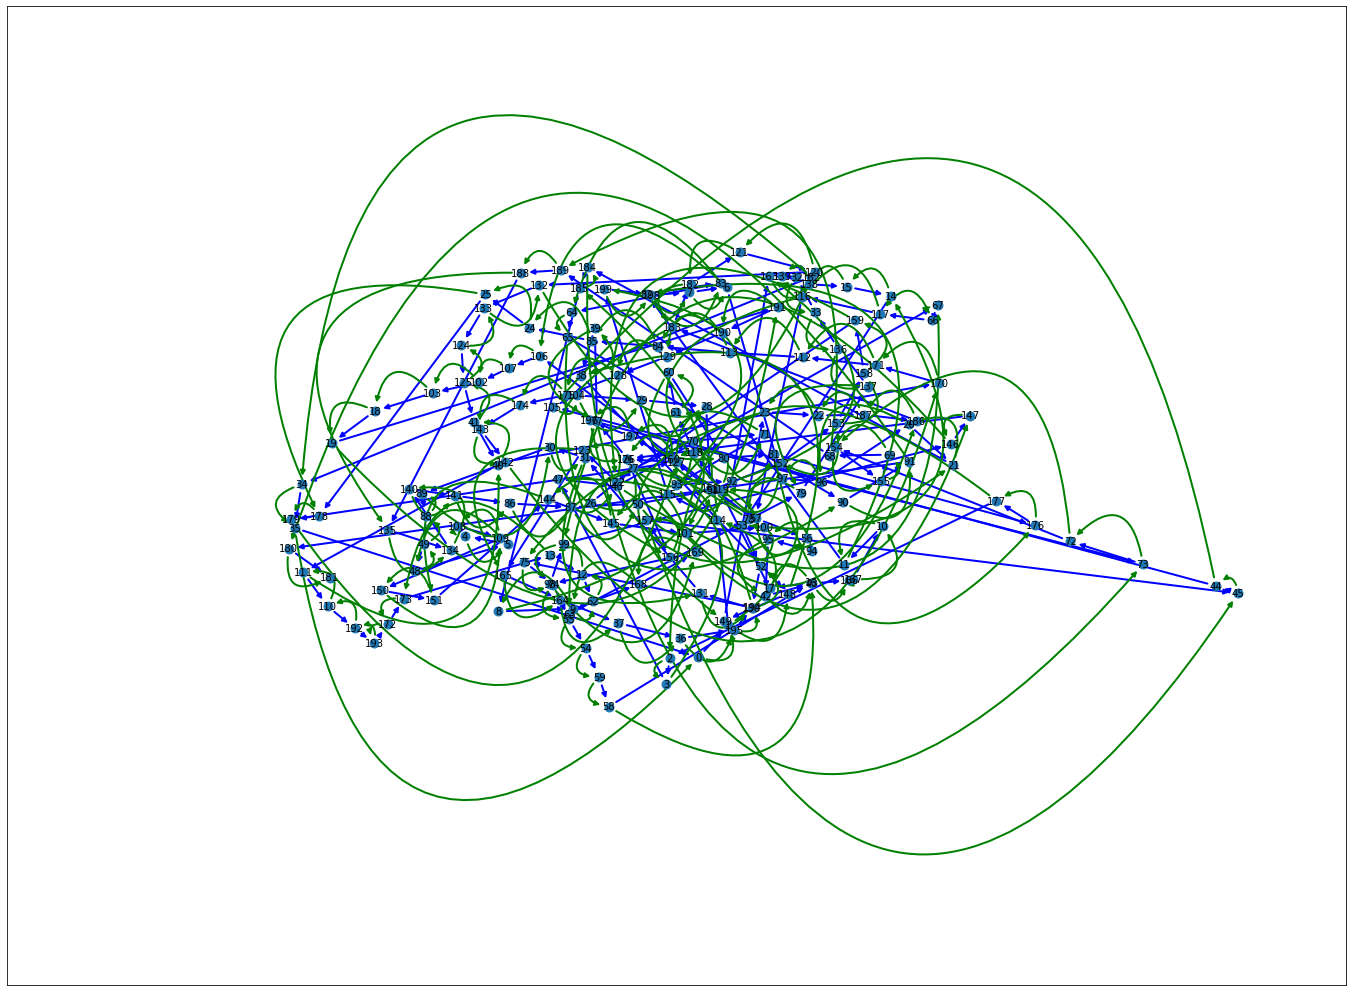

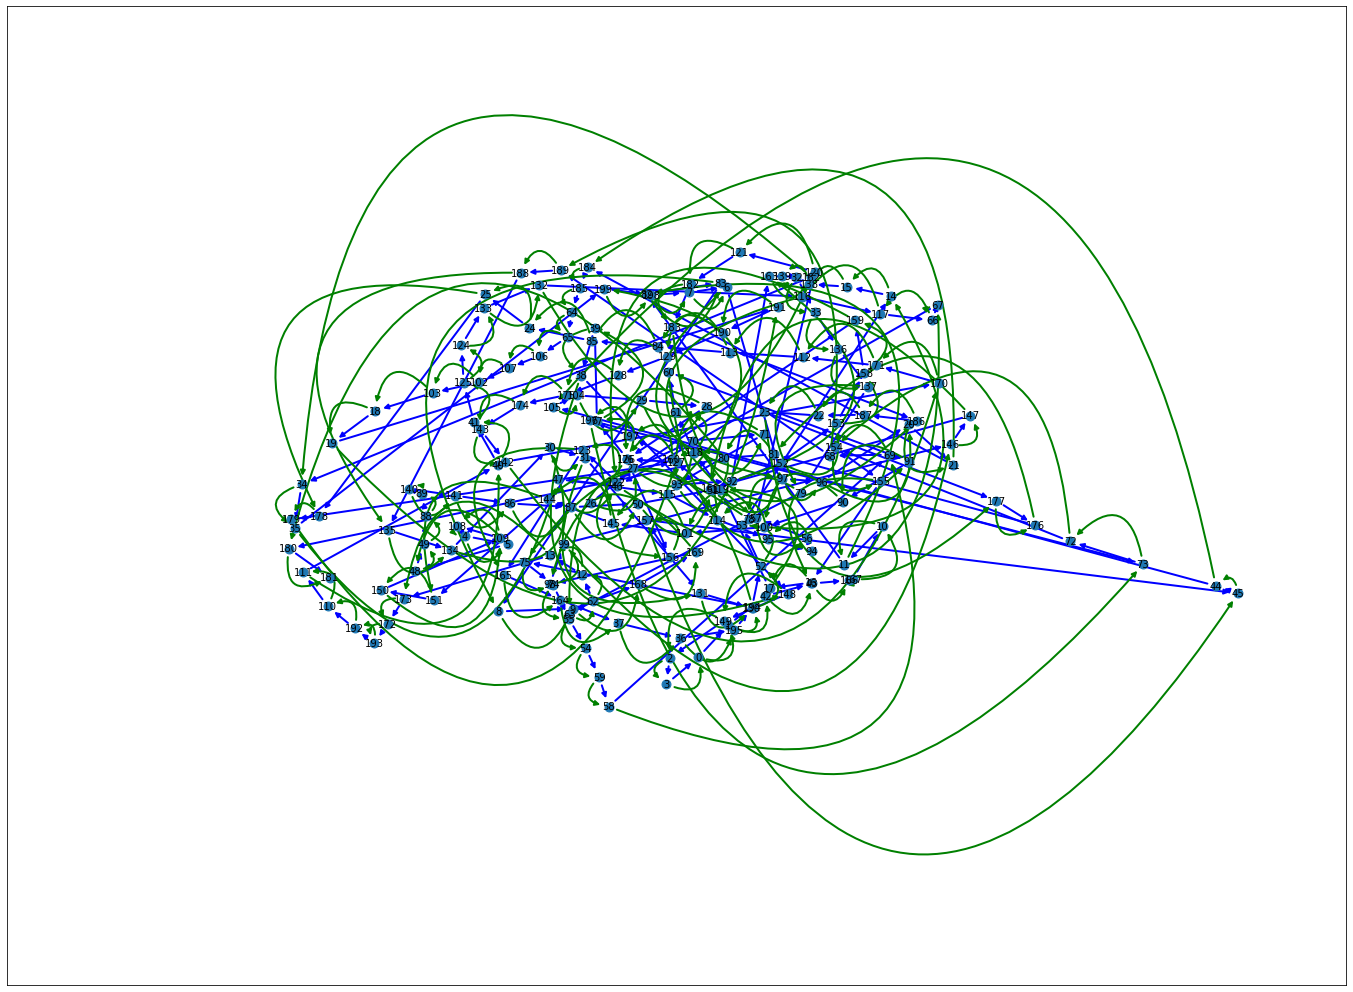

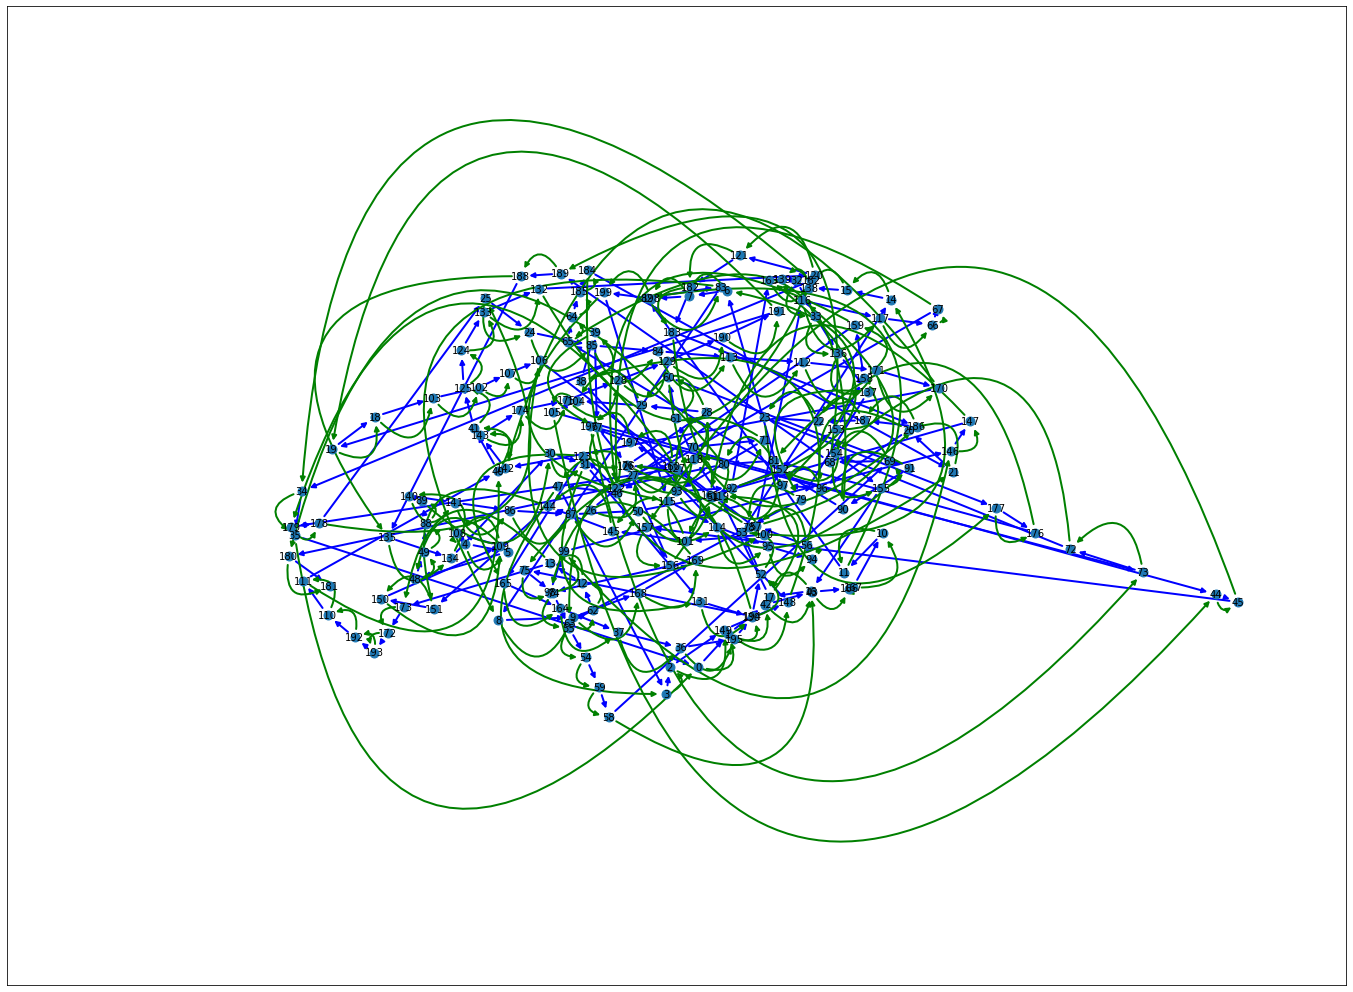

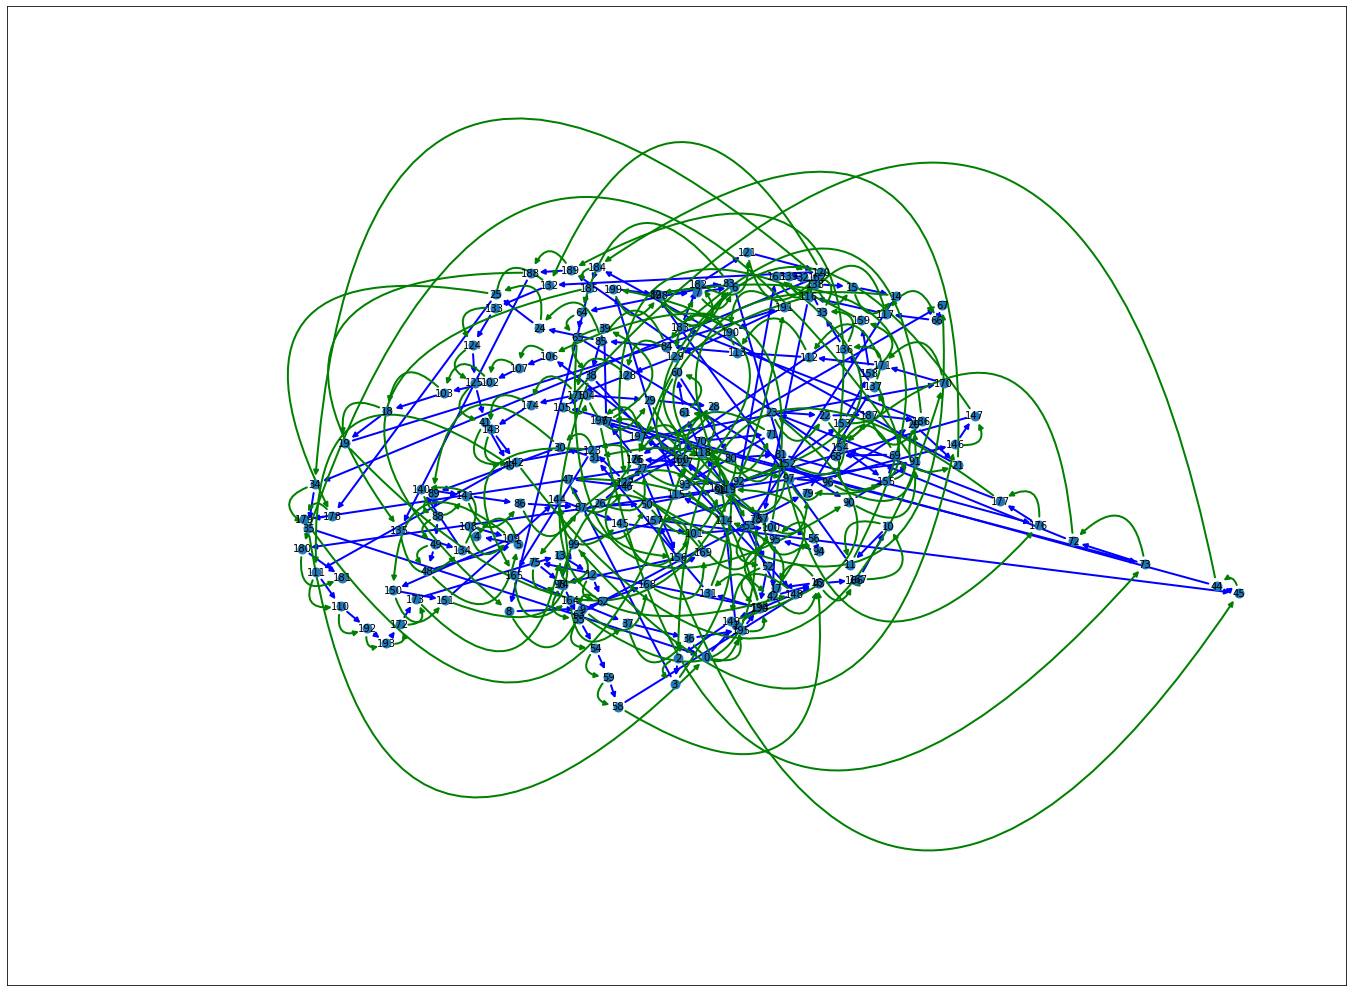

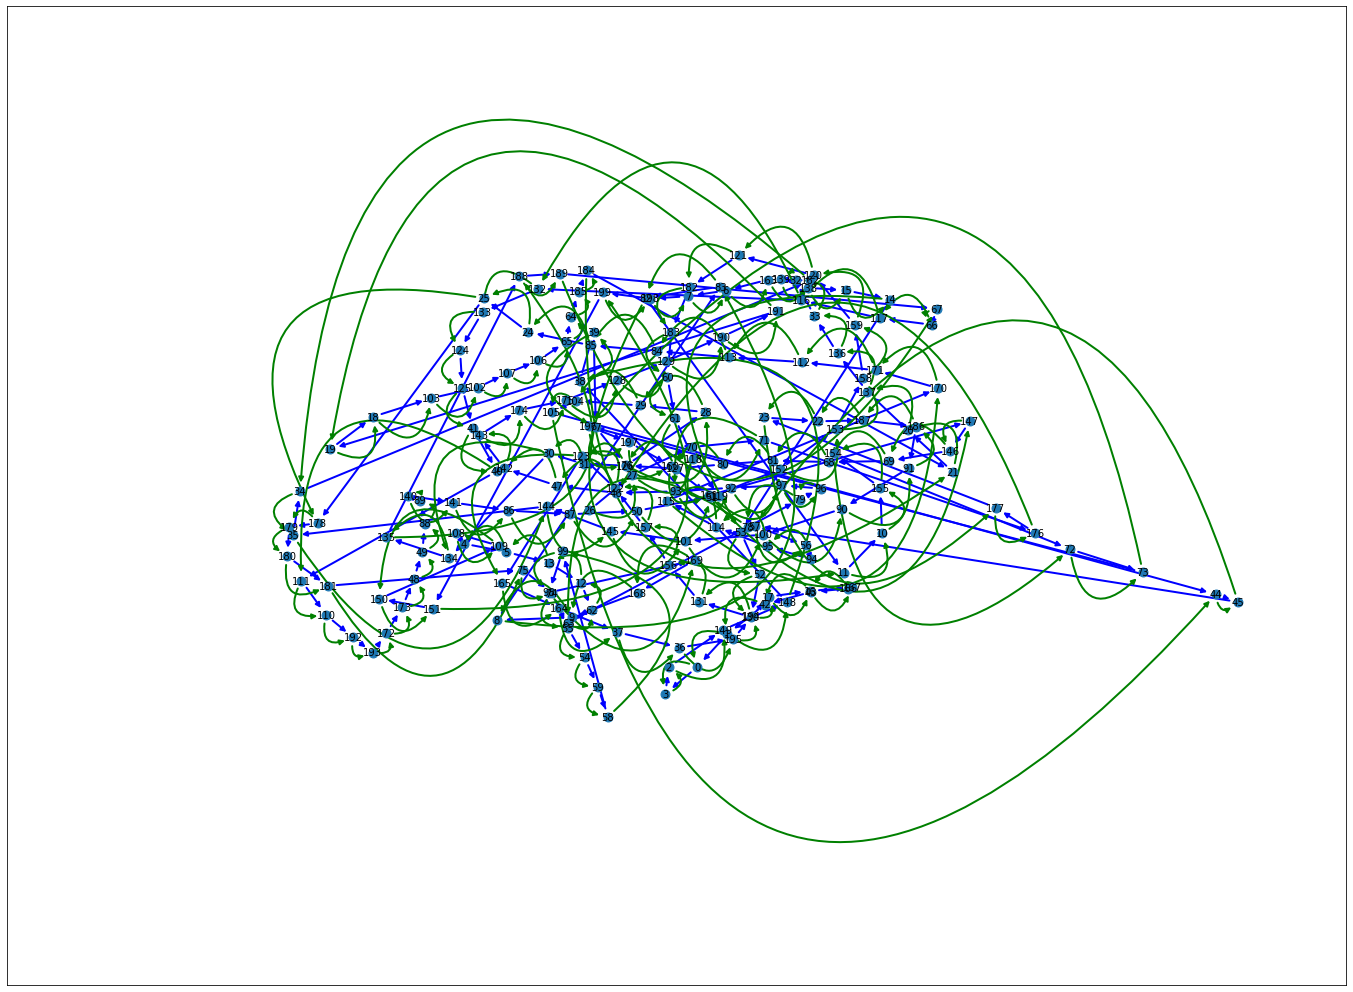

In [21]:
g_0 = gen_single_graph(d0[0])
pos = nx.spring_layout(to_networkx(g_0))
for i in np.random.choice((d0.shape[0] - 1), 5, replace = False):
    plot_multi_graph(gen_multi_graph(*d0[i:i+2]), figsize=(24,18), pos=pos)